In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#plt.style.use('ggplot')

# set the style back to default
plt.style.use('default')

#  set the parameters to default
plt.rcParams.update(plt.rcParamsDefault)

In [3]:
# set the graphics parameters
large = 22
med = 16
small = 12
params = {'figure.figsize': (16,10),
          'axes.titlesize': large,
          'axes.labelsize': med,
          'legend.fontsize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med}

plt.rcParams.update(params) # can be overwritten later
plt.style.use('seaborn-whitegrid')
sns.set_style('white')

In [4]:
data = pd.read_csv('mpg.csv')

In [5]:
data.shape

(234, 11)

In [7]:
data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [12]:
# 1
data.groupby('manufacturer')['cty'].mean().reset_index().sort_values('cty', ascending=False)

,manufacturer,cty
4,honda,24.444444
14,volkswagen,20.925926
12,subaru,19.285714
5,hyundai,18.642857
13,toyota,18.529412
10,nissan,18.076923
0,audi,17.611111
11,pontiac,17.000000
1,chevrolet,15.000000
3,ford,14.000000


In [20]:
# data prep
dataviz = data[['manufacturer','cty']].groupby('manufacturer').mean()
dataviz.reset_index(inplace=True) # update the original df instead of creating a new one
dataviz.sort_values('cty',inplace=True)

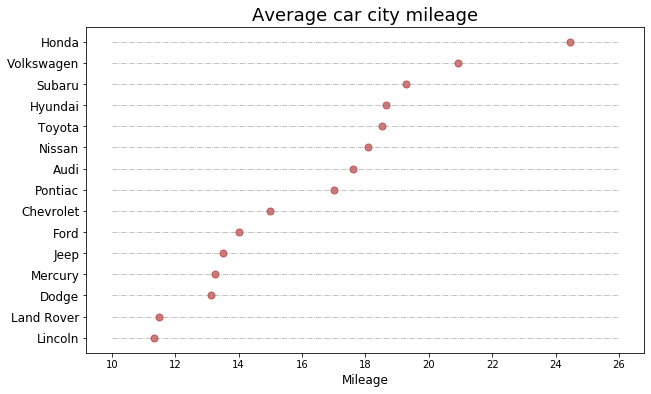

In [56]:
# data viz
# method 1
plt.figure(figsize = (10,6))
plt.scatter(dataviz.cty,
            dataviz.manufacturer,
            color = 'firebrick',
            alpha = 0.6,
            s = 50)
ax = plt.gca()
ax.hlines(dataviz.manufacturer, 10, 26,
          linestyle = '-.',
          linewidth = 0.8,
          color = 'grey',
          alpha = 0.6)
plt.title('Average car city mileage', fontsize = 18)
plt.xlabel('Mileage', fontsize = 12)
plt.yticks(np.arange(len(dataviz.manufacturer)),
           dataviz.manufacturer.str.title(),
           fontsize = 12)

plt.show()

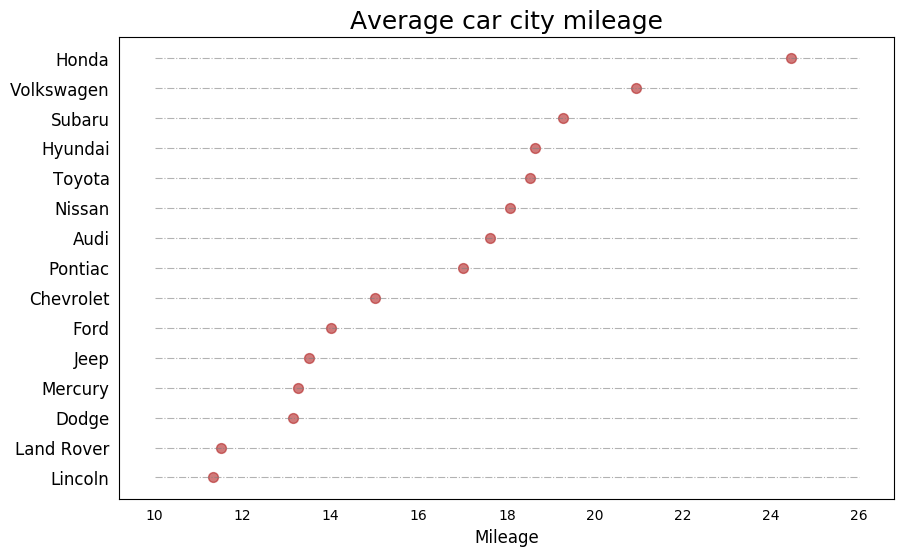

In [156]:
# data viz
# method 2
plt.figure(figsize = (10,6))
plt.scatter(dataviz.cty,
            dataviz.manufacturer.str.title(),
            color = 'firebrick',
            alpha = 0.6,
            s = 50)

# add horizontal lines
ax = plt.gca()
ax.hlines(dataviz.manufacturer.str.title(), 10, 26,
          linestyle = '-.',
          linewidth = 0.8,
          color = 'grey',
          alpha = 0.6)

# remove ticks but keep tick labels
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.title('Average car city mileage', fontsize = 18)
plt.xlabel('Mileage', fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

In [124]:
# 2
# data prep
data['cty_z'] = (data.cty - data.cty.mean()) / data.cty.std()
dataviz2 = data[['manufacturer','cty_z']].groupby('manufacturer').mean().\
           sort_values('cty_z').reset_index()
#dataviz2['color'] = dataviz2['cty_z'].apply(lambda x: 'green' if x >= 0 else 'red')
dataviz2['color'] = ['red' if i < 0 else 'green' for i in dataviz2['cty_z'] ]

In [125]:
dataviz2

,manufacturer,cty_z,color
0,lincoln,-1.298334,red
1,land rover,-1.259174,red
2,dodge,-0.874973,red
3,mercury,-0.847984,red
4,jeep,-0.789243,red
5,ford,-0.671760,red
6,chevrolet,-0.436795,red
7,pontiac,0.033136,green
8,audi,0.176726,green
9,nissan,0.286176,green


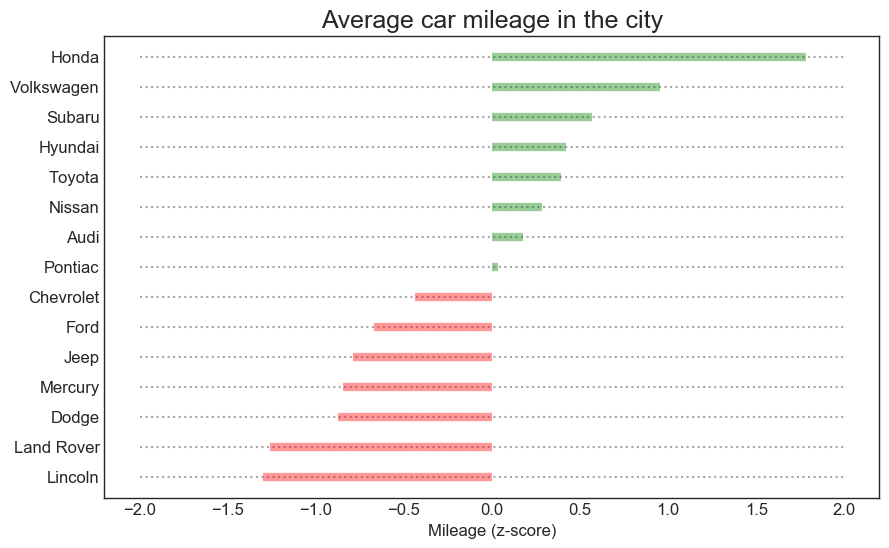

In [171]:
# data viz

plt.figure(figsize = (10,6))

ax = plt.gca()
ax.hlines(dataviz2.manufacturer.str.title(), -2, 2,
          linestyle = ':',
          color = 'grey',
          alpha = 0.7)
ax.hlines(dataviz2.manufacturer.str.title(),
          xmin = 0,
          xmax = dataviz2.cty_z,
          color = dataviz2['color'],
          linewidth = 6,
          alpha = 0.4)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Average car mileage in the city', fontsize = 18)
plt.xlabel('Mileage (z-score)', fontsize = 12)

plt.show()

In [133]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

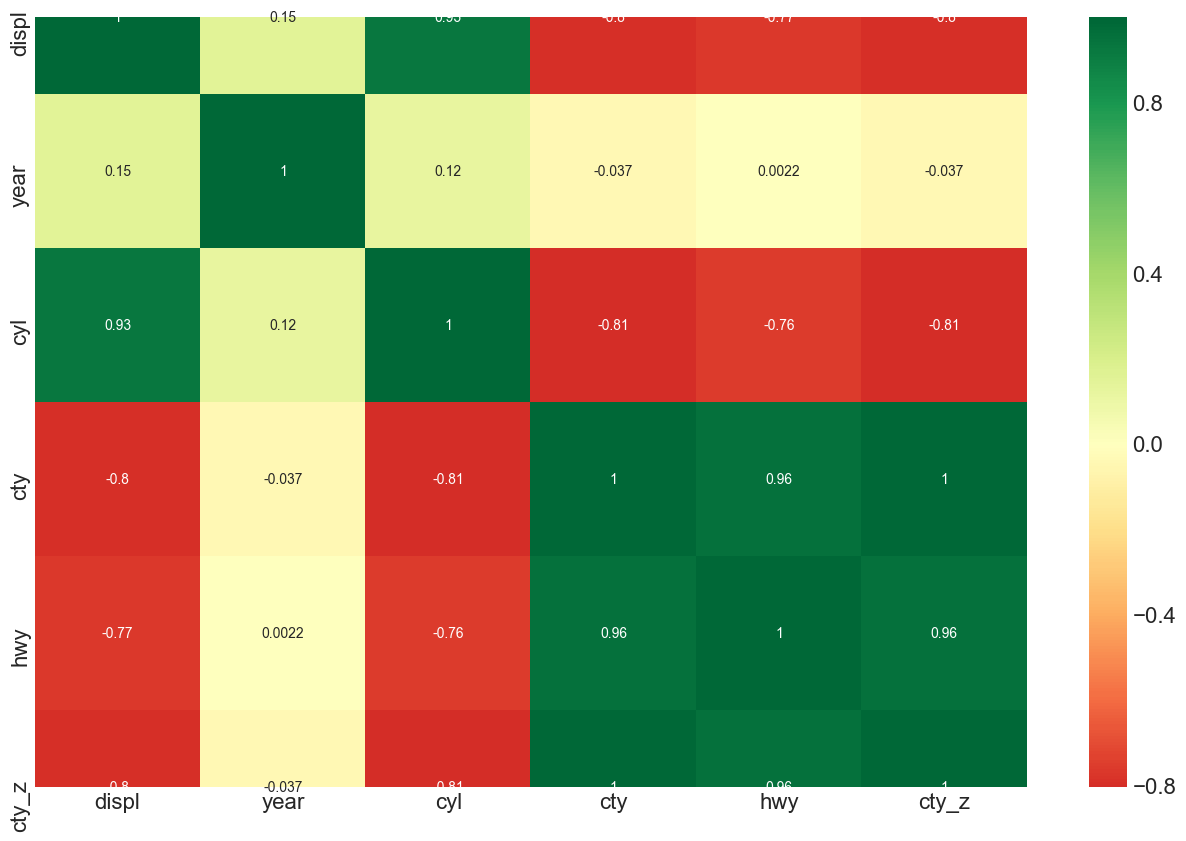

In [188]:
#3

#colorbrewer2.org

plt.figure()
sns.heatmap(data.corr(),
            cmap = 'RdYlGn',
            annot = True,
            center = 0)



plt.show()

In [194]:
#4
dataviz3 = data[['displ','cty','hwy']]
dataviz3.columns = ['Displacement','City Mileage','Highway Mileage']
dataviz3.head()

,Displacement,City Mileage,Highway Mileage
0,1.8,18,29
1,1.8,21,29
2,2.0,20,31
3,2.0,21,30
4,2.8,16,26


<Figure size 1600x1000 with 0 Axes>

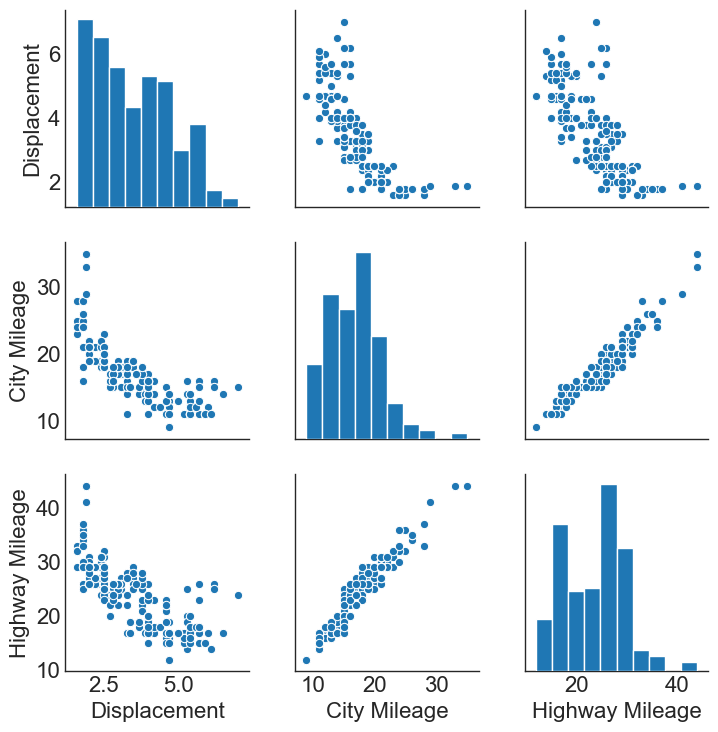

In [195]:
plt.figure()
sns.pairplot(dataviz3)
plt.show()

<Figure size 1600x1000 with 0 Axes>

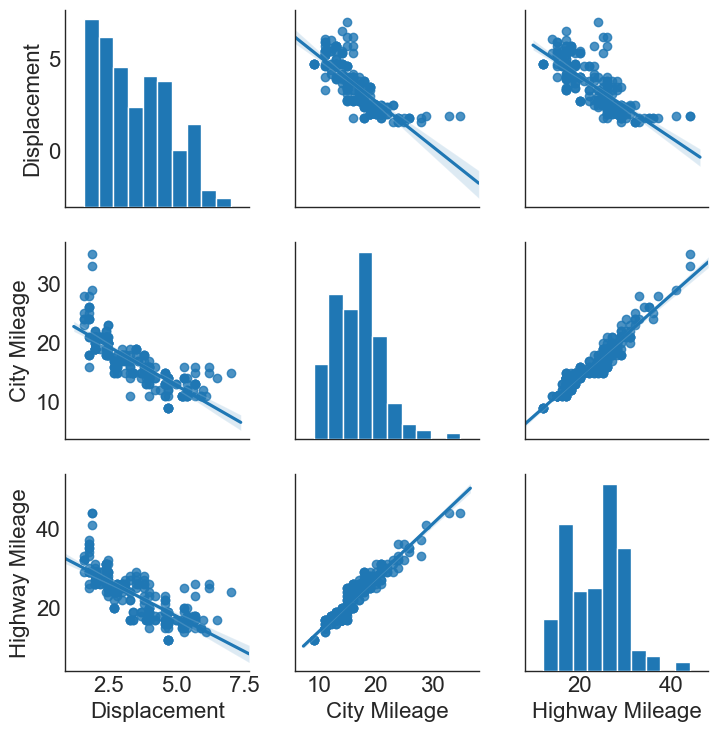

In [197]:
#5
plt.figure()
sns.pairplot(dataviz3,kind='reg')
plt.show()

In [12]:
#6
dataviz4 = data[['displ','cty','hwy','cyl']]
dataviz4.columns = ['Displacement','City Mileage','Highway Mileage', 'Cylinders']

LinAlgError: singular matrix

<Figure size 1152x720 with 0 Axes>

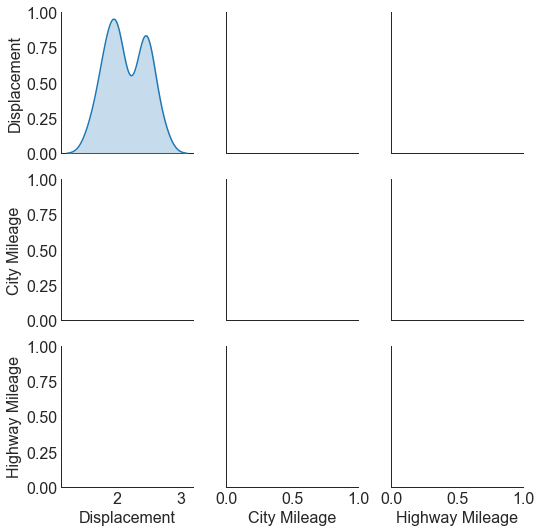

In [22]:
plt.figure()
sns.pairplot(dataviz4,
             vars = ['Displacement','City Mileage','Highway Mileage'],
             hue = 'Cylinders')
plt.show()

In [20]:
dataviz4.Cylinders = dataviz4.Cylinders.astype(str)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
